In [ ]:
import nltk
from nltk import chunk # to see pre-defined Parts of Speech Trees
import IPython.display # to visualize the tree
!pip3 install svgling
import svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.6 MB/s eta 0:00:00


corpus vs document: to do

In [ ]:
nltk.download("all", quiet = True)

True

In [ ]:
text = nltk.text.Text(nltk.corpus.gutenberg.words('melville-moby_dick.txt'))

In [ ]:
text[30:50]

['heart',
 ',',
 'body',
 ',',
 'and',
 'brain',
 ';',
 'I',
 'see',
 'him',
 'now',
 '.',
 'He',
 'was',
 'ever',
 'dusting',
 'his',
 'old',
 'lexicons',
 'and']

In [ ]:
print(text.similar('person'))

whale boat man head side one thing men ship wind pipe crew cabin
pequod body and hand eye leviathan me
None


In [ ]:
print(text.similar('whale'))

ship boat sea time captain world man deck pequod other whales air
water head crew line thing side way body
None


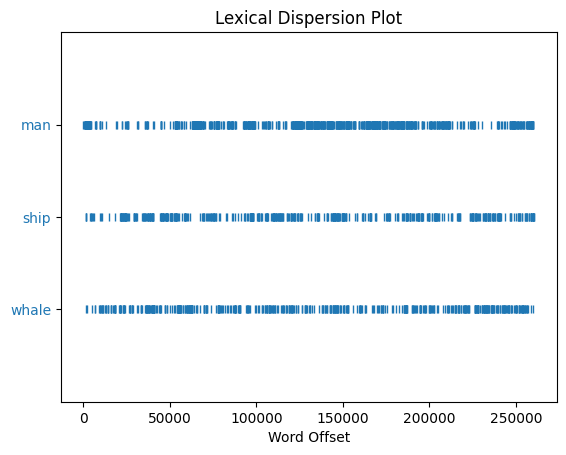

In [ ]:
text.dispersion_plot(['whale', 'ship', 'man'])

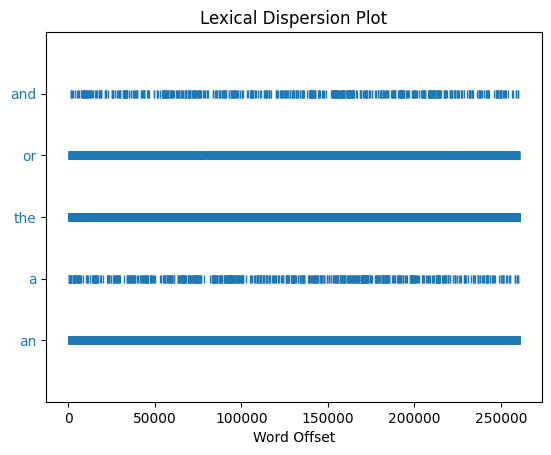

In [ ]:
text.dispersion_plot(['an', 'a', 'the', 'or', 'and'])

In [ ]:
counts = nltk.FreqDist(text)
vocabulary = len(counts.keys())
words = sum(counts.values())
lexical_diversity = float(words) / float(vocabulary)

print('Unique words: ', vocabulary)
print('Total words: ', words)

# lexical diversity ratio should be between 15 to 25
print('Diversity of words: ', lexical_diversity)

Unique words:  19317
Total words:  260819
Diversity of words:  13.502044830977896


In [ ]:
counts.most_common(15)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124)]

In [ ]:
new_text = "Harry Potter is a series of seven fantasy novels written by British author J. K. Rowling.\
 The novels chronicle the lives of a young wizard, Harry Potter, and his friends Hermione Granger and Ron Weasley,\
  all of whom are students at Hogwarts School of Witchcraft and Wizardry. The main story arc concerns Harry's conflict\
   with Lord Voldemort, a dark wizard who intends to become immortal, overthrow the wizard governing body known as \
   the Ministry of Magic, and subjugate all wizards and Muggles (non-magical people)."

In [ ]:
words = []
for word in nltk.word_tokenize(new_text):
    words.append(word)

In [ ]:
print(words[:5])

['Harry', 'Potter', 'is', 'a', 'series']


In [ ]:
tags = []
for sentence in nltk.sent_tokenize(new_text):
    tags.append(nltk.pos_tag(nltk.word_tokenize(sentence)))

print(tags[0])

[('Harry', 'NNP'), ('Potter', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('series', 'NN'), ('of', 'IN'), ('seven', 'CD'), ('fantasy', 'JJ'), ('novels', 'NNS'), ('written', 'VBN'), ('by', 'IN'), ('British', 'JJ'), ('author', 'NN'), ('J.', 'NNP'), ('K.', 'NNP'), ('Rowling', 'NNP'), ('.', '.')]


In [ ]:
print(tags)

[[('Harry', 'NNP'), ('Potter', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('series', 'NN'), ('of', 'IN'), ('seven', 'CD'), ('fantasy', 'JJ'), ('novels', 'NNS'), ('written', 'VBN'), ('by', 'IN'), ('British', 'JJ'), ('author', 'NN'), ('J.', 'NNP'), ('K.', 'NNP'), ('Rowling', 'NNP'), ('.', '.')], [('The', 'DT'), ('novels', 'NNS'), ('chronicle', 'VBP'), ('the', 'DT'), ('lives', 'NNS'), ('of', 'IN'), ('a', 'DT'), ('young', 'JJ'), ('wizard', 'NN'), (',', ','), ('Harry', 'NNP'), ('Potter', 'NNP'), (',', ','), ('and', 'CC'), ('his', 'PRP$'), ('friends', 'NNS'), ('Hermione', 'NNP'), ('Granger', 'NNP'), ('and', 'CC'), ('Ron', 'NNP'), ('Weasley', 'NNP'), (',', ','), ('all', 'DT'), ('of', 'IN'), ('whom', 'WP'), ('are', 'VBP'), ('students', 'NNS'), ('at', 'IN'), ('Hogwarts', 'NNP'), ('School', 'NNP'), ('of', 'IN'), ('Witchcraft', 'NNP'), ('and', 'CC'), ('Wizardry', 'NNP'), ('.', '.')], [('The', 'DT'), ('main', 'JJ'), ('story', 'NN'), ('arc', 'NN'), ('concerns', 'NNS'), ('Harry', 'NNP'), ("'s", 'POS'), ('c

In [ ]:
tree = chunk.ne_chunk(tags[1])
print(tree)
# GPE: Geo Political Entity

(S
  The/DT
  novels/NNS
  chronicle/VBP
  the/DT
  lives/NNS
  of/IN
  a/DT
  young/JJ
  wizard/NN
  ,/,
  (PERSON Harry/NNP Potter/NNP)
  ,/,
  and/CC
  his/PRP$
  friends/NNS
  (PERSON Hermione/NNP Granger/NNP)
  and/CC
  (PERSON Ron/NNP Weasley/NNP)
  ,/,
  all/DT
  of/IN
  whom/WP
  are/VBP
  students/NNS
  at/IN
  (ORGANIZATION Hogwarts/NNP School/NNP)
  of/IN
  (ORGANIZATION Witchcraft/NNP)
  and/CC
  (GPE Wizardry/NNP)
  ./.)


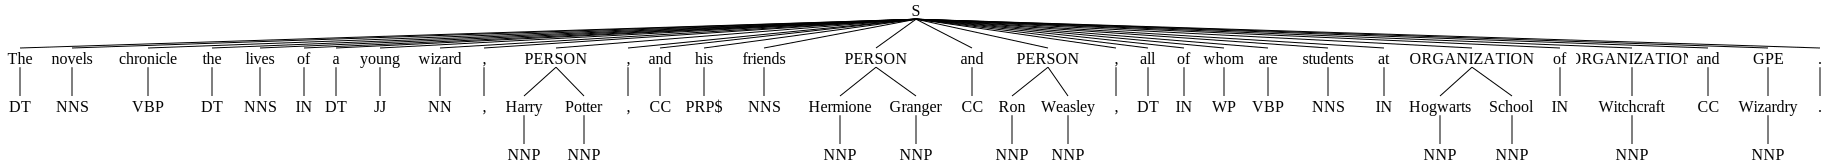

In [ ]:
IPython.display.display(svgling.draw_tree(tree))